## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [21]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [0]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 1.2935 - acc: 0.6829 - val_loss: 0.8171 - val_acc: 0.8312
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.7213 - acc: 0.8385 - val_loss: 0.6099 - val_acc: 0.8623
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5904 - acc: 0.8584 - val_loss: 0.5275 - val_acc: 0.8741
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5278 - acc: 0.8682 - val_loss: 0.4815 - val_acc: 0.8814
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.4897 - acc: 0.8747 - val_loss: 0.4515 - val_acc: 0.8870
Epoch 6/20
34432/60000 [================>.............] - ETA: 0s - loss: 0.4697 - acc: 0.877360000/60000 [==============================] - 2s 35us/step - loss: 0.4635 - acc: 0.8799 - val_loss: 0.4303 - val_acc: 0.8898
Epoch 7/20
60000/60000 [=====================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.3362289469957352
Test accuracy: 0.9093


<IPython.core.display.Javascript object>

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [0]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 2.2708 - acc: 0.2169 - val_loss: 2.2197 - val_acc: 0.2768
Epoch 2/20
60000/60000 [==============================] - 2s 42us/step - loss: 2.1739 - acc: 0.4237 - val_loss: 2.1143 - val_acc: 0.4877
Epoch 3/20
60000/60000 [==============================] - 2s 42us/step - loss: 2.0506 - acc: 0.5485 - val_loss: 1.9659 - val_acc: 0.5524
Epoch 4/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.8796 - acc: 0.6135 - val_loss: 1.7673 - val_acc: 0.6481
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.6674 - acc: 0.6659 - val_loss: 1.5414 - val_acc: 0.7205
Epoch 6/20
 5376/60000 [=>............................] - ETA: 2s - loss: 1.5430 - acc: 0.698160000/60000 [==============================] - 2s 41us/step - loss: 1.4449 - acc: 0.7125 - val_loss: 1.3233 - val_acc: 0.7513
Epoch 7/20
60000/60000 [=====================

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.4582893396139145
Test accuracy: 0.8816


<IPython.core.display.Javascript object>

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


<h2>MLP + Sigmoid activation + ADAM </h2>

In [0]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.5308 - acc: 0.8636 - val_loss: 0.2550 - val_acc: 0.9259
Epoch 2/20
53120/60000 [=========================>....] - ETA: 0s - loss: 0.2244 - acc: 0.934060000/60000 [==============================] - 3s 51us/step - loss: 0.2205 - acc: 0.9351 - val_loss: 0.1946 - val_acc: 

Test score: 0.06385514608082886
Test accuracy: 0.9824


<IPython.core.display.Javascript object>


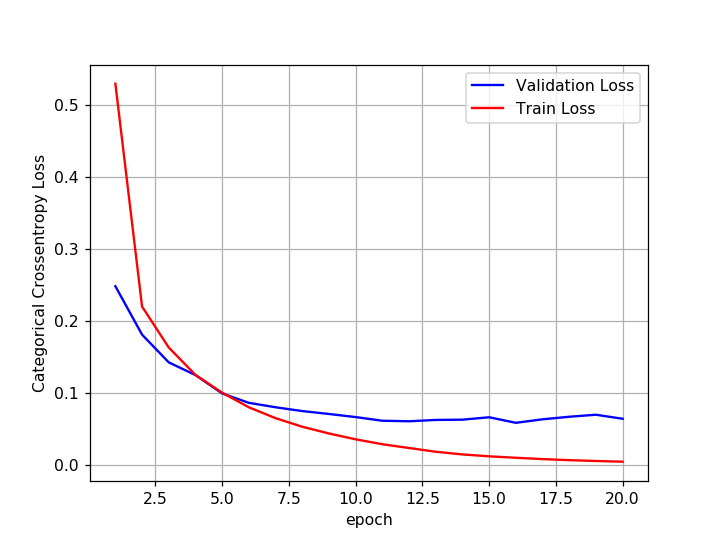

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


<h2> MLP + ReLU +SGD </h2>

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.7579 - acc: 0.7812 - val_loss: 0.3951 - val_acc: 0.8921
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3535 - acc: 0.8998 - val_loss: 0.3040 - val_acc: 0.9153
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2900 - acc: 0.9172 - val_loss: 0.2648 - val_acc: 0.9253
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2558 - acc: 0.9269 - val_loss: 0.2393 - val_acc: 0.9316
Epoch 5/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.2324 - acc: 0.9340 - val_loss: 0.2210 - val_acc: 0.9371
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2144 - acc: 0.9391 - val_loss: 0.2072 - val_acc: 0.9400
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1995 - acc: 0.9443 - val_loss: 0.1957 - val_acc

Test score: 0.12405014228336513
Test accuracy: 0.9631


<IPython.core.display.Javascript object>


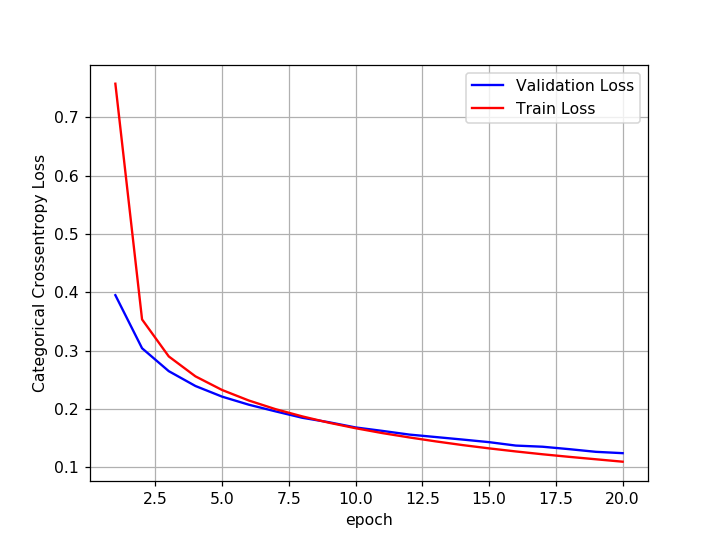

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


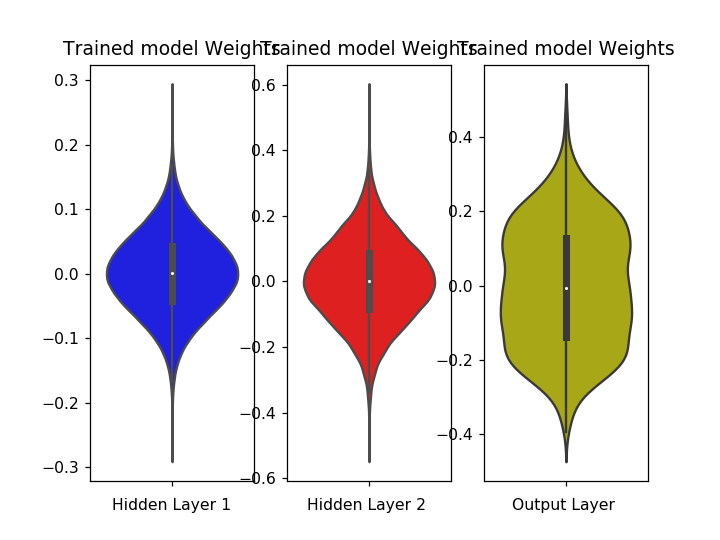

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [0]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.2341 - acc: 0.9295 - val_loss: 0.1165 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0878 - acc: 0.9729 - val_loss: 0.0883 - val_acc: 0.9720
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step

Test score: 0.10294274219236926
Test accuracy: 0.9805


<IPython.core.display.Javascript object>


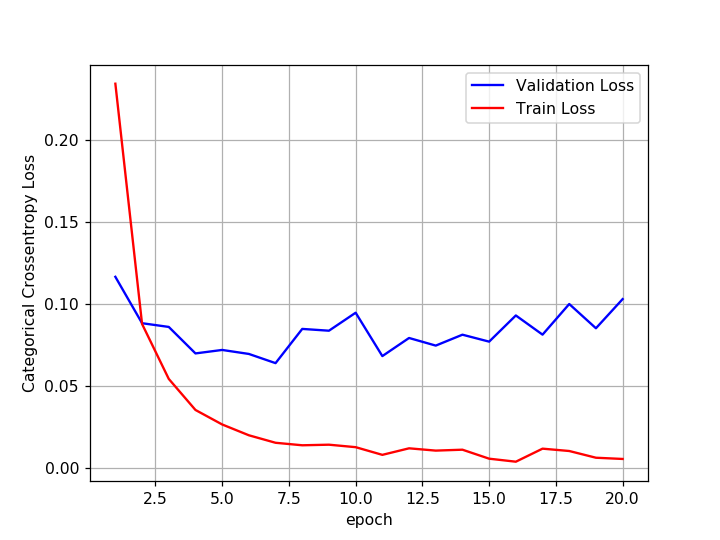

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


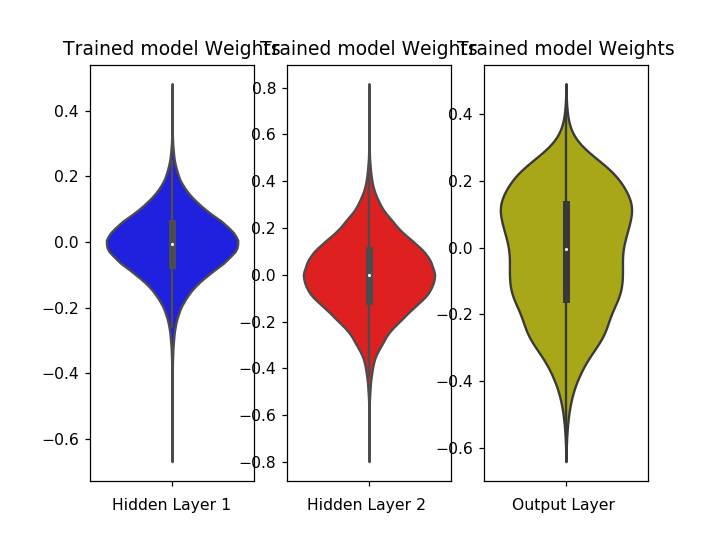

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3036 - acc: 0.9104 - val_loss: 0.2116 - val_acc: 0.9376
Epoch 2/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1747 - acc: 0.9483 - val_loss: 0.1670 - val_acc: 0.9505
Epoch 3/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.1367 - acc: 0.9599 - val_loss: 0.1451 - val_acc: 0.9567
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1134 - acc: 0.9666 - val_loss: 0.1335 - val_acc: 0.9603
Epoch 5/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.0949 - acc: 0.9703 - val_loss: 0.1325 - val_acc: 0.9589
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0802 - acc: 0.9758 - val_loss: 0.1139 - val_acc: 0.9652
Epoch 7/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0682 - acc: 0.9787 - val_loss: 0.1136

Test score: 0.10456635547156475
Test accuracy: 0.9732


<IPython.core.display.Javascript object>


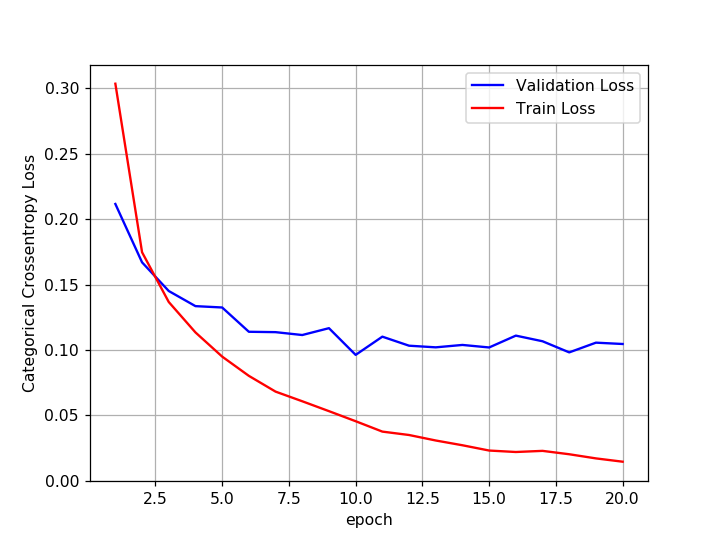

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


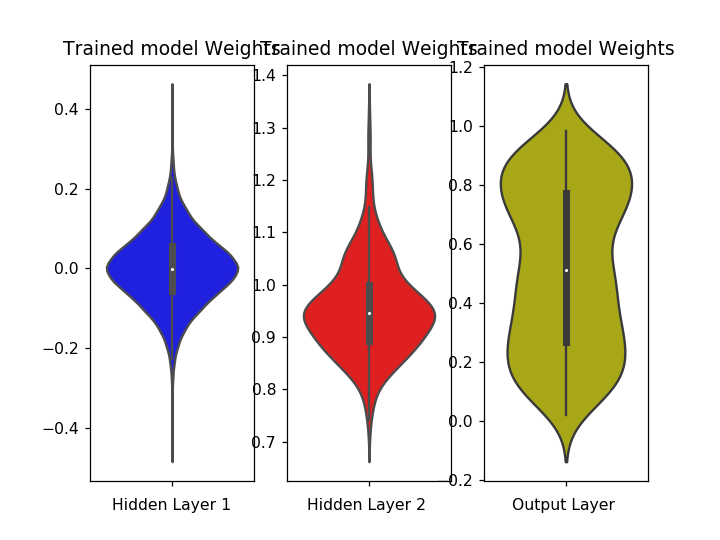

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.6612 - acc: 0.7951 - val_loss: 0.2860 - val_acc: 0.9166
Epoch 2/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.4250 - acc: 0.8710 - val_loss: 0.2545 - val_acc: 0.9252
Epoch 3/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.3841 - acc: 0.8846 - val_loss: 0.2391 - val_acc: 0.9298
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3551 - acc: 0.8927 - val_loss: 0.2279 - val_acc: 0.9325
Epoch 5/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.3355 - acc: 0.8986 - val_loss: 0.2127 - val_acc: 0.9356
Epoch 6/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.3234 - acc: 0.9031 - val_loss: 0.2029 - val_acc: 0.9387: 1s - loss:
Epoch 7/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.3068 - acc: 0.9077 - val_l

Test score: 0.1093290721397847
Test accuracy: 0.9679


<IPython.core.display.Javascript object>


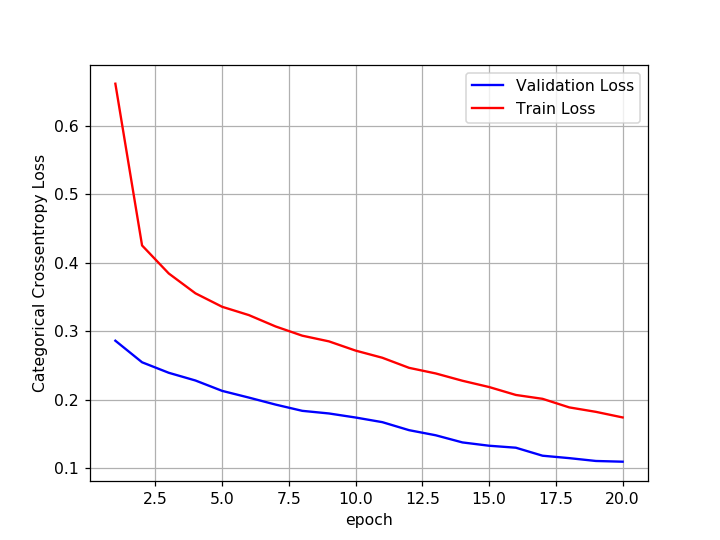

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


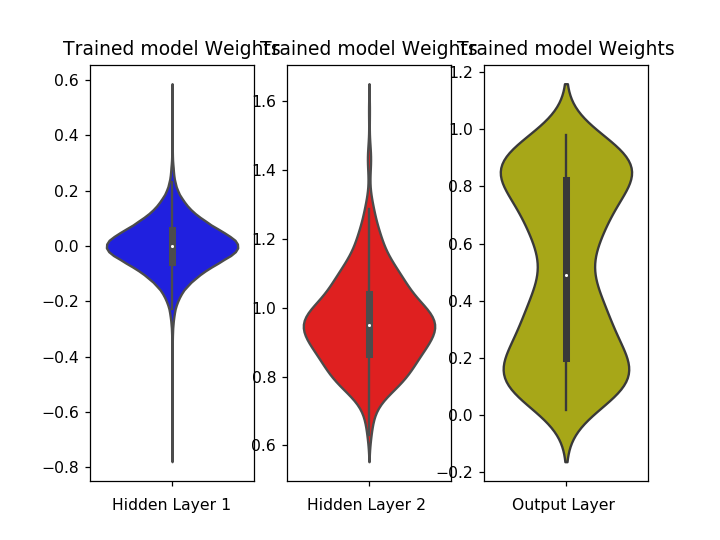

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975633 using {'activ': 'relu'}
0.974650 (0.001138) with: {'activ': 'sigmoid'}
0.975633 (0.002812) with: {'activ': 'relu'}


## **Assignment Start**

Two Layer NN. 



*   Optimizer - Adam
*   Activation - Relu
*   Initialization - He



1. Without Batch Normalization and without Dropout rate

In [0]:
import keras.initializers
import math

In [0]:
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

In [12]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(256)))))
model.add(Dense(64,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64)))))
model.add(Dense(10,activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64+1)))))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.3073 - acc: 0.9095 - val_loss: 0.1434 - val_acc: 0.9566
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1115 - acc: 0.9677 - val_loss: 0.0990 - val_acc: 0.9691
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0746 - acc: 0.9779 - val_loss: 0.0930 - val_acc: 0.9700
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0523 - acc: 0.9846 - val_loss: 0.0753 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0375 - acc: 0.9887 - val_loss: 0.0792 - val_acc: 0.9764
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0293 - acc: 0.9912 - val_loss: 0.0804 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 0

In [24]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.10937498900425048
Test accuracy: 0.9763


<IPython.core.display.Javascript object>

In [0]:
%matplotlib inline

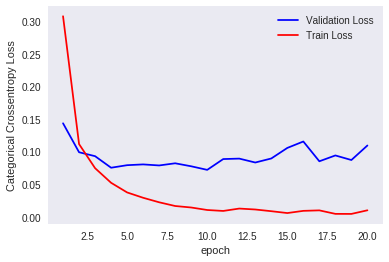

In [34]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
w_after = model.get_weights()

In [53]:
for i in range(0, len(w_after), 2):
  print('-'*20)
  print(f'layer {i/2 + 1} = {len(w_after[i])} rows with {w_after[i].shape[1]} columns')
  print(f'Bias weights = {len(w_after[i+1])}')

--------------------
layer 1.0 = 784 rows with 256 columns
Bias weights = 256
--------------------
layer 2.0 = 256 rows with 64 columns
Bias weights = 64
--------------------
layer 3.0 = 64 rows with 10 columns
Bias weights = 10


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


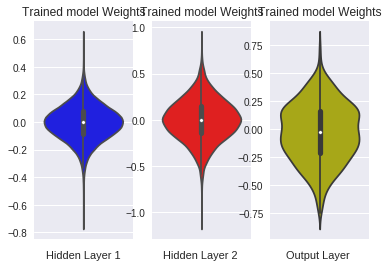

In [54]:
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

With Batch Normalization and Without Drop Out

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2885 - acc: 0.9156 - val_loss: 0.1283 - val_acc: 0.9613
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0998 - acc: 0.9702 - val_loss: 0.0943 - val_acc: 0.9700
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0605 - acc: 0.9822 - val_loss: 0.0797 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0422 - acc: 0.9872 - val_loss: 0.0799 - val_acc: 0.9751
Epoch 5/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0308 - acc: 0.9912 - val_loss: 0.0709 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0247 - acc: 0.9927 - val_loss: 0.0793 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0194 - acc: 0.9940 - val_loss: 0.0796 - val_acc

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


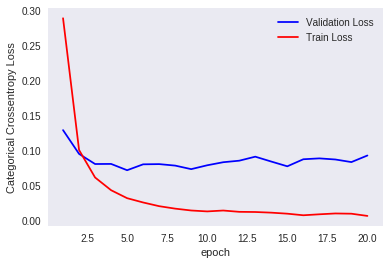

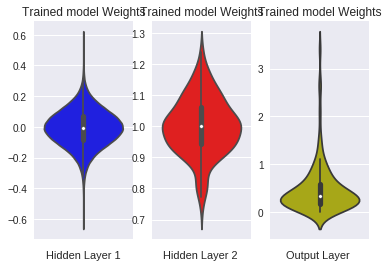

In [57]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(256)))))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64)))))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64+1)))))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

With Drop Out WIth out Batch Normalization

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.3038 - acc: 0.5811 - val_loss: 0.3091 - val_acc: 0.9174
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.5869 - acc: 0.8242 - val_loss: 0.2218 - val_acc: 0.9368
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.4414 - acc: 0.8742 - val_loss: 0.1883 - val_acc: 0.9479
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3794 - acc: 0.8945 - val_loss: 0.1687 - val_acc: 0.9512
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3399 - acc: 0.9064 - val_loss: 0.1615 - val_acc: 0.9562
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.3098 - acc: 0.9176 - val_loss: 0.1455 - val_acc: 0.9596
Epoch 7/20
60

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


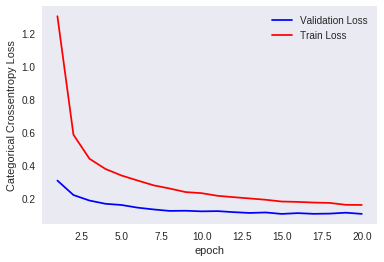

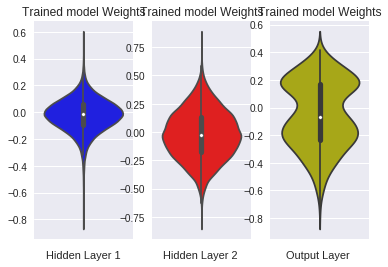

In [58]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(256)))))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64)))))
model.add(Dropout(0.7))
model.add(Dense(10,activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64+1)))))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

With Both Drop out and Batch Normalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 1.0323 - acc: 0.6887 - val_loss: 0.2642 - val_acc: 0.9233
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.4794 - acc: 0.8593 - val_loss: 0.1987 - val_acc: 0.9425
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3674 - acc: 0.8975 - val_loss: 0.1591 - val_acc: 0.9505
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.3055 - acc: 0.9151 - val_loss: 0.1460 - val_acc: 0.9566
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2664 - acc: 0.9261 - val_loss: 0.1244 - val_acc: 0.9632
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2401 - acc: 0.9337 - val_loss: 0.1173 - val_acc: 0.9652
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2193 - acc: 0.9404 - val_loss: 0.1061 - val_acc

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


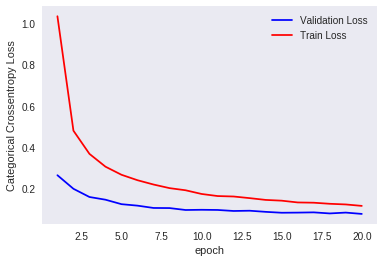

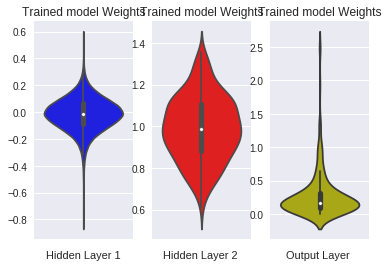

In [59]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(256)))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64)))))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(10,activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64+1)))))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Increate Drop Out to 0.8 to check if there is change in test accuracy

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 1.9807 - acc: 0.4193 - val_loss: 0.5710 - val_acc: 0.8807
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step - loss: 1.0347 - acc: 0.6514 - val_loss: 0.4032 - val_acc: 0.9055
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.8144 - acc: 0.7370 - val_loss: 0.3131 - val_acc: 0.9164
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.6923 - acc: 0.7848 - val_loss: 0.2669 - val_acc: 0.9260
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.6206 - acc: 0.8151 - val_loss: 0.2419 - val_acc: 0.9284
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.5631 - acc: 0.8359 - val_loss: 0.2241 - val_acc: 0.9340
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.5178 - acc: 0.8513 - val_loss: 0.2061 - val_acc

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


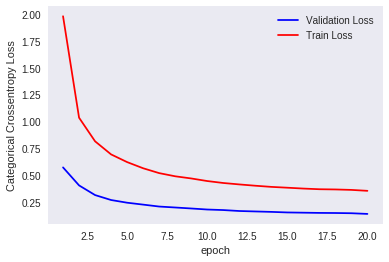

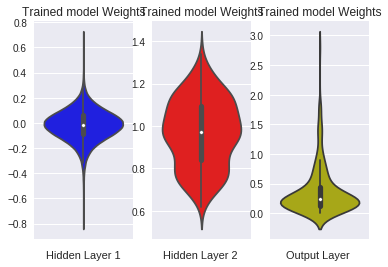

In [60]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(256)))))
model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(Dense(64,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64)))))
model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(Dense(10,activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64+1)))))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### **it is found that increase in drop out decreases the accuracy.**

3 Layers with drop out and Batch Normalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 1.2316 - acc: 0.6096 - val_loss: 0.3106 - val_acc: 0.9127
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.5942 - acc: 0.8278 - val_loss: 0.2284 - val_acc: 0.9341
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.4573 - acc: 0.8742 - val_loss: 0.1851 - val_acc: 0.9458
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3939 - acc: 0.8933 - val_loss: 0.1654 - val_acc: 0.9526
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3430 - acc: 0.9076 - val_loss: 0.1516 - val_acc: 0.9576
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3164 - acc: 0.9170 - val_loss: 0.1414 - val_acc: 0.9600
Epoch 7/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2945 - acc: 0.9224 - val_loss: 0.1365 - val_ac

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


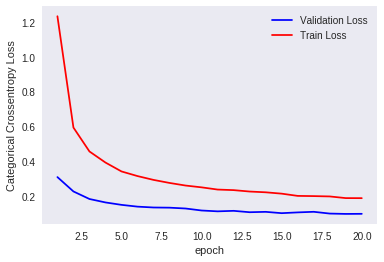

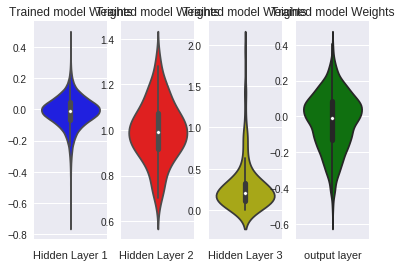

In [62]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(784)))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(128)))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64)))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(32+1)))))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('output layer')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.9250 - acc: 0.7212 - val_loss: 0.2173 - val_acc: 0.9369
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.3467 - acc: 0.9113 - val_loss: 0.1428 - val_acc: 0.9598
Epoch 3/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2539 - acc: 0.9356 - val_loss: 0.1257 - val_acc: 0.9650
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2083 - acc: 0.9477 - val_loss: 0.1180 - val_acc: 0.9685
Epoch 5/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1802 - acc: 0.9558 - val_loss: 0.1024 - val_acc: 0.9722
Epoch 6/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.1624 - acc: 0.9593 - val_loss: 0.1003 - val_acc: 0.9738
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.1455 - acc: 0.9638 - val_loss: 0.0868 -

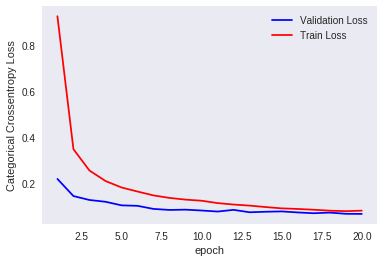

In [63]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(784)))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(512)))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(256)))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(128)))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(64)))))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=math.sqrt(2/(32+1)))))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion

In [0]:
import pandas as pd

In [0]:
results_df = pd.DataFrame(columns=['Layers', 'Batch Normalization', 'Drop out', 'Test Accuracy'])

results_df.loc[0] = ['256 x 64' , 'no', '-', 0.9763]
results_df.loc[1] = ['256 x 64' , 'yes', '-', 0.9781]
results_df.loc[2] = ['256 x 64' , 'no', '0.5, 0.7', 0.9781]
results_df.loc[3] = ['256 x 64' , 'yes', '0.5, 0.7', 0.9792]
results_df.loc[4] = ['256 x 64' , 'yes', '0.8, 0.8', 0.9593]
results_df.loc[5] = ['128 x 64 x 32' , 'yes', '0.5, 0.5, 0.5', 0.9728]
results_df.loc[6] = ['512 x 256 x 128 x 64 x 32' , 'yes', '0.4, 0.3, 0.4, 0.3', 0.9821]

In [68]:
results_df.sort_values(by='Test Accuracy', axis = 0, inplace=True)
results_df

,Layers,Batch Normalization,Drop out,Test Accuracy
4,256 x 64,yes,"0.8, 0.8",0.9593
5,128 x 64 x 32,yes,"0.5, 0.5, 0.5",0.9728
0,256 x 64,no,-,0.9763
1,256 x 64,yes,-,0.9781
2,256 x 64,no,"0.5, 0.7",0.9781
3,256 x 64,yes,"0.5, 0.7",0.9792
6,512 x 256 x 128 x 64 x 32,yes,"0.4, 0.3, 0.4, 0.3",0.9821




*   Increase in Drop Out decreases accuracy
*   Adding batch Normalization increase accuracy

